In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import time
import cmath 
from cmath import pi, exp
from scipy import signal
import json

In [2]:
img = cv2.imread('./test_images/prova00.png',0)

In [3]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)

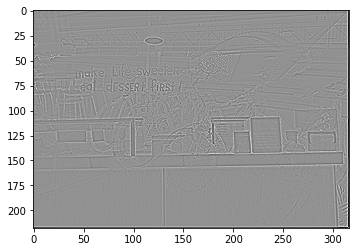

In [4]:
plt.imshow(laplacian,cmap='gray')

In [5]:
corr = signal.correlate2d(laplacian, laplacian, boundary='symm', mode='same')

(218, 316)


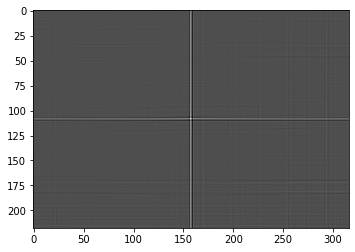

In [6]:
plt.imshow(corr,cmap='gray')
print(corr.shape)

In [7]:
#function to detect dk 

def maxima(im,k, thresh = 4):
    
    ht,wd = im.shape
    ori_h = ht // 2
    ori_w = wd // 2
    maxx = {}
        
    for i in range(ht-k+1):
        for j in range(wd-k+1):
            
            #center pixel
            cell_i = i+k//2
            cell_j = j+k//2
                        
            #if pixel in the vicinity of origin, ignore
            if abs(cell_i-ori_h) <=4 and abs(cell_j-ori_w) <=4:
                continue
            
            flat = im[i:i+k, j:j+k].flatten()
            flat.sort()
            
            #if the first and second maxima differ <= thresh, ignore
            if abs(flat[-1]-flat[-2]) <=thresh : 
                continue
                
            else:
                maxx[flat[-1]] = (cell_i,cell_j)
    
    return sorted(maxx.items())   

In [8]:
res = maxima(corr, 5)

In [9]:
print("probable values of dk :")
print(res[-1][1])
print(res[-2][1])

probable values of dk :
(104, 159)
(102, 159)


In [14]:
corr.shape[0]//2 +1 - res[-1][1][0]

6

In [16]:
corr.shape[1]//2 +1

159

In [17]:
corr.shape

(218, 316)